# Markov Simulation
Simulates and plots long-run behavior of a Markov process.

## How to Develop a Markov Transition Matrix for a Discrete Time Process

The transition matrix is a fundamental component in modeling the probabilities of moving between states in a Markov chain. Developing a Markov transition matrix for a discrete-time process involves several key steps. 

1. **Identify States**: Determine all possible states in the Markov process. Let's denote these states as $S_1, S_2, \ldots, S_n$.

2. **Define Transition Probabilities**: For each state, define the probability of transitioning to every other state (including itself). These probabilities are based on historical data, empirical observations, or theoretical considerations.

3. **Create the Matrix**: Construct a matrix where each element $P_{ij}$ represents the probability of transitioning from state $i$ to state $j$. The matrix should be square with dimensions $n \times n$, where $n$ is the number of states.

4. **Ensure Valid Probabilities**: Each row of the matrix must sum to 1, as it represents a probability distribution.

5. **Validate the Matrix**: Check the matrix against known behaviors of the system to ensure it accurately represents the process.

The transition matrix $P$ is given by:

$$
P = \begin{bmatrix}
P_{11} & P_{12} & \cdots & P_{1n} \\
P_{21} & P_{22} & \cdots & P_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
P_{n1} & P_{n2} & \cdots & P_{nn}
\end{bmatrix}
$$

Where $P_{ij}$ is the probability of moving from state $i$ to state $j$.

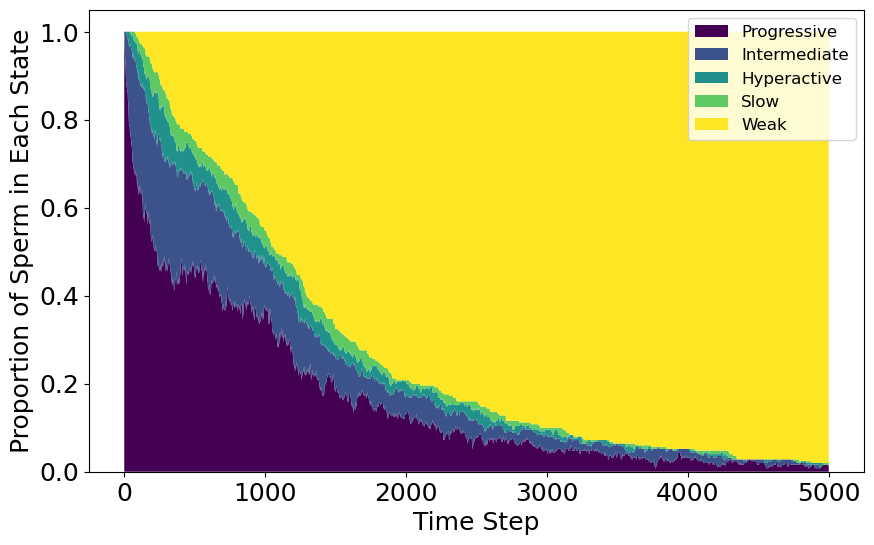

In [42]:
# Import necessary libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt

# Define the number of sperm cells to simulate
num_cells = 250

# Define the transition matrix for state transitions, where each row represents the current state,
# and each column represents the probability of transitioning to another state
P = np.array([
    [.99, 0.01, 0.00, 0.00, 0.0],  # Transition probabilities from Progressive
    [0.02, 0.97, 0.01, 0.00, 0.0],  # Transition probabilities from Intermediate
    [0.00, 0.02, 0.96, 0.02, 0.0],  # Transition probabilities from Hyperactive
    [0.0, 0.00, 0.02, 0.97, 0.01],  # Transition probabilities from Slow
    [0.0, 0.00, 0.00, 0.00, 1]     # Transition probabilities from Weak (absorbing state)
])

# Set the number of time steps for the simulation
num_steps = 5000

# Initialize a matrix to track the state of all cells over time.
state_matrix = np.zeros((num_steps + 1, 5))
# Initially, all cells are in the Progressive state.
state_matrix[0, 0] = num_cells

# Initialize an array to track the current state of each cell
current_states = np.zeros(num_cells, dtype=int)

# Simulate the state transitions over time for each sperm cell
for step in range(1, num_steps + 1):
    for cell in range(num_cells):
        # Use the cell's current state to determine the next state
        next_state = np.random.choice(a=5, p=P[current_states[cell]])
        # Update the cell's state
        current_states[cell] = next_state
        # Increment the count of cells in the chosen next state
        state_matrix[step, next_state] += 1

# Normalize the state matrix to calculate the proportion of cells in each state at each time step
state_proportions = state_matrix / num_cells

# Plot the results using a stackplot
plt.figure(figsize=(10, 6))
plt.stackplot(range(num_steps + 1), state_proportions[:, 0], state_proportions[:, 1], 
              state_proportions[:, 2], state_proportions[:, 3], state_proportions[:, 4], 
              labels=['Progressive', 'Intermediate', 'Hyperactive', 'Slow', 'Weak'], 
              colors=plt.cm.viridis(np.linspace(0, 1, 5)))  # Use the 'viridis' color palette
plt.legend(loc='upper right', fontsize=12)  # Place a legend in the upper right corner
#plt.title(f'State Proportion Over Time for {num_cells} Sperm Cells')  # Set the plot title
plt.xlabel('Time Step', fontsize=18)  # Label the x-axis as 'Time Step'
plt.ylabel('Proportion of Sperm in Each State', fontsize=18)  # Label the y-axis
plt.tick_params(axis='both', labelsize=18)  # Adjust tick font size for both axes
# Save the figure before showing it
plt.savefig('state_proportion_over_time.tif', format='tif', dpi=300)  # Save as a TIFF file with 300 dpi

plt.show()  # Display the plot
